<style>
    pre {
        white-space: pre-wrap;
        word-wrap: break-word;
    }
</style>

<div style="display:flex; justify-content:space-around; align-items:center; background-color:#cccccc; padding:5px; border:2px solid #333333;">
    <a href="https://estudios.upct.es/grado/5251/inicio" target="_blank">
    <img src="https://www.upct.es/contenido/universidad/galeria/identidad-2021/logos/logos-upct/marca-upct/marca-principal/horizontal/azul.png" alt="UPCT" style="height:145px; width:auto;">
    <a href="https://www.um.es/web/estudios/grados/ciencia-ingenieria-datos/" target="_blank">
    <img src="https://www.um.es/documents/1073494/42130150/LogosimboloUMU-positivo.png" alt="UMU" style="height:200px; width:auto;">
</div>

# Asignatura: **Deep Learning**

## Titulación: **Grado en Ciencia e Ingeniería de Datos**

## Práctica 4: Autocodificadores
### **Sesión 3/3: Autocodificadores variacionales**

**Autores**: Juan Morales Sánchez, Antonio Martínez Sánchez, José Luís Sancho Gómez y Juan Antonio Botía Blaya
___

### Objetivos

- Diseño de un *autoencoder* variacional.
- Comprender el aprendizaje probabilístico y las diferencias respecto a un *autoencoder* convencional
- Comprender el concepto de reparametrización y muestreo del espacio latente.
- Aplicación a la generación de imágenes.

### Contenidos
- [El dataset CelebA](#dataset)
- [*Autoencoder* variacional](#VAE)
- [Ejercicios](#ejercicios)

### Requisitos 
<a class='anchor' id='requisitos'></a>

- [Numpy](https://pypi.org/project/numpy/) (computación numérica)
- [Scipy](https://pypi.org/project/scipy/) (computación científica)
- [Scikit-learn](https://pypi.org/project/scikit-learn/) (*Machine Learning*)
- [Scikit-image](https://pypi.org/project/scikit-image/) (*Image Processing*)
- [Matplotlib](https://pypi.org/project/matplotlib/) y [Seaborn](https://pypi.org/project/seaborn/) (visualización de datos)
- [Tensorflow](https://www.tensorflow.org/) 2.x que incluye a [Keras](https://www.tensorflow.org/guide/keras) 2.x (*Deep Learning*)



<a class='anchor' id='dataset'></a>

## El dataset CelebA

En esta sesión de prácticas emplearemos también el dataset [50k Celeba Dataset 64x64](https://www.kaggle.com/datasets/therealcyberlord/50k-celeba-dataset-64x64).

<a class='anchor' id='VAE'></a>

## *Autoencoder* variacional

Un *autoencoder* variacional (VAE) es un tipo específico de *autoencoder* generativo. Mientras que un autoencoder clásico se centra en aprender una representación compacta (o codificación) para reconstruir la entrada, un autoencoder generativo, como el VAE, va un paso más allá: aprende una distribución probabilística en el espacio latente que permite generar nuevas muestras.

<div style="display:flex; justify-content:space-around; align-items:center; padding:5px solid #333333;">
    <img src="./VAE.png" style="height:300px; width:auto">
</div>

Podemos resumir las principales diferencias de un VAE respecto a un *autoencoder* convencional en:

- **Aprendizaje probabilístico:**  
  En un VAE se modela la codificación como una distribución, habitualmente gaussiana de media $\mu$ y varianza $\sigma$, lo que permite tomar muestras de dicha distribución en el espacio latente $z$ y generar datos nuevos. Esto contrasta con un *autoencoder* tradicional, que produce una representación determinista.

- **Pérdida combinada:**  
  Los VAE añaden a la función de pérdida no solo el error de reconstrucción, sino también un término de divergencia KL (Kullback-Leibler) que regulariza la distribución latente $z$ para que se aproxime a la distribución de probabilidad predeterminada. Esto facilita la generación de muestras coherentes y continuas en el espacio latente.

- **Generación de nuevos datos:**  
  Mediante el muestreo en el espacio latente los VAE pueden generar nuevos datos que son similares a los datos de entrenamiento, convirtiéndolos en modelos generativos efectivos.

  A continuación se muestra un ejemplo de resultados de generación de imágenes de caras mediante VAE a partir del dataset [50k Celeba Dataset 64x64](https://www.kaggle.com/datasets/therealcyberlord/50k-celeba-dataset-64x64): 

<div style="display:flex; justify-content:space-around; align-items:center; padding:5px solid #333333;">
    <img src="./generated_images.png" style="height:1000px; width:auto">
</div>

In [ ]:


# Importar librerías necesarias
import os
import numpy as np
from tensorflow.keras.utils import get_file
from tensorflow.image import rgb_to_grayscale
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Descargar el dataset
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/therealcyberlord/50k-celeba-dataset-64x64"

dataset_path = get_file(origin=dataset_url, extract=True)

base_dir = os.path.join(os.path.dirname(dataset_path), '50k-celeba-dataset-64x64', '50k')
try:
    os.listdir(base_dir)
except:
    base_dir = os.path.join(os.path.dirname(dataset_path), '50k')

print(f"Leyendo imágenes desde {base_dir:s}")

# Preparar listas para imágenes
NUMBER_OF_IMAGES = 10000 # <= 50000
IMAGE_DIM = (64, 64)

images = np.empty((NUMBER_OF_IMAGES, *IMAGE_DIM, 3))
#images_gray = np.empty((NUMBER_OF_IMAGES, *IMAGE_DIM, 1))
for i, img_file in enumerate(os.listdir(base_dir)):
    if (i > 0) and (i%1000 == 0):
        print(f"Cargadas {i:d} imágenes...")
    if i == NUMBER_OF_IMAGES:
        break
    img_path = os.path.join(base_dir, img_file)
    img = load_img(img_path, target_size=IMAGE_DIM, color_mode='rgb')   # Redimensionar imágenes
    images[i] = img_to_array(img) / 255.0            # Normalizar a [0, 1]
    # images_gray[i] = rgb_to_grayscale(images[i])

Leyendo imágenes desde C:\Users\User\.keras\datasets\50k
Cargadas 1000 imágenes...
Cargadas 2000 imágenes...
Cargadas 3000 imágenes...
Cargadas 4000 imágenes...
Cargadas 5000 imágenes...
Cargadas 6000 imágenes...
Cargadas 7000 imágenes...
Cargadas 8000 imágenes...
Cargadas 9000 imágenes...
Cargadas 10000 imágenes...


In [2]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate
from tensorflow.keras import Model
import os

SEED = 1337
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


#forzar determinismo en GPU

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
tf.config.experimental.enable_op_determinism()  # TF >= 2.9

<a class='anchor' id='ejercicios'></a>

## Ejercicios

**E1:** Partiendo del trabajo de la sesión anterior, adapte un *autoencoder* convolucional de 3 niveles de profundidad, utilizando capas convolucionales 2D de 16, 32 y 64 mapas de características, más el nivel correspondiente al espacio latente (dimensión 64), para que se comporte como un *autoencoder* variacional. Para ello se debe atender a los aspectos puntualizados en el [apartado previo](#VAE) y [personalizar el modelo](https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing) para: 1) incorporar la reparametrización y muestro del espacio latente, forzando su estadística a una distribución normal (se requieren capas adicionales totalmente conectadas para enlazar con el nuevo espacio latente reparametrizado), y 2) implementación de la pérdida combinada (suma de la pérdida estándar del *autoencoder* con la pérdida de divergencia KL).

$\text{KL}_{\text{loss}} = -\frac{1}{2} \sum \left(1 + \log(\sigma^2) - \mu^2 - \sigma^2 \right)$



La KL divergence mide cuánto se diferencia una distribución de probabilidad 𝑄 respecto a otra distribución de referencia P. Sirve para penalizar cuando el encoder genera distribuciones que se alejan de la distribución predeterminada..

In [3]:
x_train = images
x_train.shape[1:]

(64, 64, 3)

Al plantearl el modelo hemos tenido en cuenta los siguientes puntos:

- A diferencia de un autoencoder convolucional, el espacio latene no puede ser un mapa de características. Una vez tenemos la salida del encoder como un mapa de características, nos guardamos su dimensionalidad para redimensionarlo a esa misma dimensión, justo antes de empezar el decoder. 
Debemos aplanar el mapa de características obtenido tras el encoder, para obtener a partir de él dos representaciones aplanadas de la imagen en dos 'vectores' del tamaño de LATENT DIM, esto lo hacemos creando dos capas densas que toman como entrada el mapa de características aplanado. Estos vectores definen los parámetros de una distribución normal multivariante en el espacio latente, que será la que nos permita tomar muestras para generar nuevos datos. Los vectores adoptan los nombres de 'z_mean' y 'z_log_var'

- Estos vectores se aplican en una función sampling o de muestreo, que gestiona el muestreo de una normal por medio del trick de reparametrización.
El trick de reparametrización es la clave matemática que permite entrenar un VAE usando backpropagation, a pesar de que hay una operación de muestreo aleatorio en medio, que normalmente rompería el flujo de gradientes, lo que impediría el backpropagation al no poderse derivar a través de una operación de muestreo aleatorio. Por lo que para evitar eso, lo que se hace es muestrear solamente el valor de un epsilon, el cual sigue una normal multivariante de media z_mean. 
Epsilon sería como un ruido blanco aleatorio, que se añade a una expresión que conforman z_mean y z_log_var, la cual genera el espacio latente. De esta forma al derivar esta expresión epsilón se mantiene como un término constante, mientras que la expresión del espacio latente z sí sería diferenciable respecto a z_mean y z_log_var. Por lo tanto, es el épsilon el que introduce 'aleatoriedad' en la expresión del espacio latente, dado que los vectores z_mean y z_log_var provienen realmente de la imágen pasada como entrada.

- Para obtener el espacio latente como una función z dependiente de los vectores z_mean y z_log_var, no basta con solo definir la función de sampling, sino que debemos añadirla a la estructura de la red mediante una capa lambda. Esta permkte definir funciones y usarlas como capas de la red.

- Una vez tenemos la expresión del espacio latente, debemos generar la salida a partir de esta. Para ello convertimos el espacio latente en otro vector (capa densa) que tenga el mismo número de elementos que tenía el mapa de características obtenido tras el encoder al haberle hecho el flatten. Y por último, una vez tenemos la representación con el mismo número de elementos que el mapa de características aplanado, vamos a reestruturarla como mapa de característcias de nuevo, para poder usarlo como entrada del decoder (de ahí la importancia de guardarnos su dimensionalidad).

- En este punto a pesar de tener el encoder y decoder bien configurados, seguimos sin tener listo el autoencoder. Y es que no podemos generar el autoencoder tal y como lo hacíamos en sesiones anteriores con otras arquitecturas. El autoencoder variacional requiere que definamos una clase auxiliar 'VAE', dado que no debemos generar un autoencoder al uso, como estábamos acostumbrados en los demás autoencoders densos, o sparse, puesto que en este caso debemos tener en cuenta la implementación de una pérdida combinada. 
Si definiéramos al autoencoder simplemente como un modelo que tiene por entrada la capa de entrada directamente y como salida la reconstrucción de la codificación del espacio latente, usaría como función de pérdida automáticamente el error entre la entrada y la salida (calculado conforme a la función de pérdida que definiéramos en el compile, si es que definimos alguna). Sin embargo en el VAE, no solo se busca medir como de bien ha reconstruido el modelo, sino también medir la diferencia entre la distribución aprendida y la que queremos que tenga. A esta diferencia entre la distribución aprendida por el modelo, y la que debería de haber aprendido, se le conoce como pérdida de divergencia KL. Y a la combinación de ambas pérdidas del modelo en una única, se le llama pérdida combinada.

In [4]:
from tensorflow import keras
from keras import models, losses, layers, Model, backend as K

def vae_structure(latent_dim, input_shape = x_train.shape[1:]):
    #hiperparámetros
    INPUT_SHAPE = input_shape
    LATENT_DIM = latent_dim
    F1, F2 = latent_dim//4, latent_dim//2
    

    #ENCODER
    input_layer = keras.layers.Input(shape=INPUT_SHAPE)      

    x = keras.layers.Conv2D(16, kernel_size = 3, strides=2,padding ='same')(input_layer)   # el número de filtros 
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)

    x = keras.layers.Conv2D(32, kernel_size = 3, strides = 2 , padding ='same')(x)   
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)

    x = keras.layers.Conv2D(64, kernel_size = 3, strides = 2, padding ='same')(x)   
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)

    #Ahora el expacio latente ya no va a ser un mapa de características, sino una distribución de probabilidad
    #Empezábamos con dimensiones(64,64,3) -->> (32,32,16) -->> (16,16,32) -->> (8,8,64)
    #Obtengo la dimensionalidad del mapa de caractarísticas originado tras el encoder
    previous_shape = x.shape[1:]
    x = keras.layers.Flatten()(x)

    #Generar capas densas (fully connected) para media y varianza
    #Transformamos la represenatción aplanada de la imagen en dos 'vectores' del tamaño de LATENT DIM. Estos vectores definen los parámetros 
    # de una distribución normal multivariante en el espacio latente que será la que nos permita tomar muestras para generar nuevos datos
    z_mean = keras.layers.Dense(LATENT_DIM, name="z_mean")(x)
    z_log_var = keras.layers.Dense(LATENT_DIM, name="z_log_var")(x)

    # Los vectores se aplican en esta función sampling que gestiona el muestreo de una normal por medio del trick de reparametrización.
    #El trick de reparametrización (reparameterization trick) es la clave matemática que permite entrenar un VAE usando backpropagation, 
    # a pesar de que hay una operación de muestreo aleatorio en medio, que normalmente rompería el flujo de gradientes.
    #Se rompería el backpropagation dado que no se puede derivar a través de una operación de muestreo aleatorio. Por lo que para evitar eso, lo que e hace es muestrear el valor de epsilon, el cual 
    #sigue una normal de media z_mean. 
    # Sería como un ruido blanco aleatorio que se añade a la expresión que conforman z_mean y z_log_var, la cual genera el espacio latente. De esta forma al deriva esat expresión, epsión se mantiene
    # como un término constante mientras que la expresión de z sí sería diferenciable respecto a z_mean y z_log_var

    def samplig(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape = K.shape(z_mean))
        return z_mean + K.exp(0.5*z_log_var)*epsilon        #media + desviación típica * epsilon

    # De esta forma se obtiene el espacio latente como una función z dependiente de la media y varianza antes generada.
    z = layers.Lambda(samplig, name = 'z')([z_mean, z_log_var]) #Pasamos la función sampling a capa del modelo, mediante una capa lambda
    encoder = keras.Model(input_layer, [z_mean, z_log_var, z], name = 'encoder')  

    #Ahora una vez tenemos la expresión del espacio latente debemos generar la salida a partir de esta. Para ello convertimos el vector del espacio latente en otro vector (capa densa)
    # que tenga el mismo número de elementos que tenía el mapa de características obtenido tras el encoder, tras haberle hecho el flatten. Y por último una vez tenemos la representación con el mismo número
    # de elementos que el mapa de características aplanado, vamos a reestruturarla como mapa de característcias de nuevo para poder usarlo como entrada del decoder.

    latent_input = keras.layers.Input(shape = (LATENT_DIM,))
    x = keras.layers.Dense(previous_shape[0] * previous_shape[1] * previous_shape[2])(latent_input)
    x = keras.layers.Reshape((previous_shape[0], previous_shape[1], previous_shape[2]))(x)
    # x = keras.layers.Dense(INPUT_SHAPE[0]//2**3 * INPUT_SHAPE[1]//2**3 * LATENT_DIM)(latent_input)  #Podemos usar las dimensiones de la entrada, o bien tener una variable anterior como previous shape que recoja la dimensionalidad del mapa de características generado tras el encoder antes de ser aplanado
    # x = keras.layers.Reshape((INPUT_SHAPE[0]//2**3, INPUT_SHAPE[1]//2**3, LATENT_DIM))(x)           #Así podríamos hacer la reestructuración de nuevo a formato de mapa de características para continuar con el decoder.
    #Una vez tenemos el espacio latente como mapa de características seguimos aplicándole las capas convolucionales del decoder.

    #DECODER
    x = keras.layers.Conv2DTranspose(64, kernel_size = 3,strides = 2 ,padding ='same')(x)  
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)

    x = keras.layers.Conv2DTranspose(32, kernel_size = 3,strides = 2,padding ='same')(x)  
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)

    x = keras.layers.Conv2DTranspose(16, kernel_size = 3, strides = 2, padding ='same')(x)  
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.LeakyReLU(alpha = 0.2)(x)
                                                                        
    reconstructed = keras.layers.Conv2DTranspose(INPUT_SHAPE[2], kernel_size = 3, padding ='same', activation = 'sigmoid')(x)        
    decoder = keras.Model(latent_input, reconstructed, name = 'decoder')                 
    #autoencoder = keras.Model(inputs = input_layer, outputs = reconstructed)   

    return encoder, decoder
    #Generamos la clase VAE dado que no podemos generar un autoencoder al uso, como estábamos acostumbrados en los demás autoencoders densos, o sparse, dado que en este caso debemos tener en cuenta
    #la implementación de una pérdida combinada. Si definiéramos al autoencoder simplemente como un modelo que tiene por entrada la capa de entrada directamente y como salida la reconstrucción de 
    # la codificación del espacio latente, usaría como función de pérdida automáticamente el error entre la entrada y la salida (calculado conforme a la función de pérdida que definiéramos en el compile, si es que definimos alguna)
    #
    # Sin embargo en el VAE, no solo se busca medir como de bien ha reconstruido el modelo, sino también medir la diferencia entre la distribución aprendida y una normal estándar. A esta diferncia entre la distribución aprendida
    # por el modelo, y la que debería de haber aprendido, se le conoce como pérdida de divergencia KL. Y a la combinación de ambas pérdidas del modelo en una única, se le llama pérdida combinada.




El decoder recibe como entrada un vector del espacio latente que no sólo contiene la información determinista extraída de la imagen original, sino también una porción de ruido aleatorio épsilon muestreado de una distribución normal. Gracias a este término estocástico, cada codificación de una misma imagen incorpora pequeñas variaciones, de modo que la reconstrucción resultante no es una copia exacta, sino una nueva imagen con rasgos muy parecidos a la original pero con diferencias propias.

In [5]:

class VAE(Model):
    def  __init__(self, encoder, decoder, kl_weight, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.kl_weight = K.variable(kl_weight, name = 'kl_weight')

    def call(self, inputs):
        INPUT_SHAPE = inputs.shape[1:]
        z_mean, z_log_var, z = self.encoder(inputs)        #Recordamos que hemos definido al encoder de forma que al recibir las entradas devuelve como salida [z_mean, z_log_var, z]
        reconstructed = self.decoder(z)                     #Siendo z la expresión del espacio latente que se trata de un muestreo de la distribución de probabilidad
                                                    
        #Pérdida de reconstrucción 
        reconstruction_loss = K.mean(K.square(inputs - reconstructed))*INPUT_SHAPE[0]*INPUT_SHAPE[1]
        #Pérdida KL
        kl_loss = -0.5*K.sum(1+z_log_var -  K.square(z_mean) - K.exp(z_log_var), axis = -1 )
        #Pérdida Total
        total_loss = K.mean(reconstruction_loss + self.kl_weight * kl_loss)
        self.add_loss(total_loss)
        return reconstructed  
    


Dado que la clase VAE que definimos ya incluye la implementación de la pérdida combinada en su método call(), no es necesario especificar explícictamente una función de pérdida en el compile(). El modelo ya manejará la pérdida internamente.



**E2:** Entrene el modelo con las imágenes de caras en color, y genere conjuntos de nuevas imágenes, similares a los mostrados en el [apartado previo](#VAE). Comente las diferencias en cuando a prestaciones con un *autoencoder* convolucional: calidad de la reconstrucción conseguida, número de parámetros necesarios en el modelo, tiempo de entrenamiento, etc. Tenga en cuenta que dado que el objetivo fundamental en este caso es generar imágenes y no reconstruirlas, los conjuntos de validación y test son prescindibles, y la parada anticipada puede realizarse directamente sobre el conjunto de entrenamiento (el sobreajuste puede mejorar la capacidad de generación de imágenes).


Con el objetivo de inducir sobreajuste, configuramos el early_stop para que supervise la pérdida en el conjunto de entrenamiento en lugar de en validación. Al mismo tiempo, limitamos el número de épocas, ya que un entrenamiento excesivo, sobre todo con un modelo muy bueno, puede llevar a un fenómeno de “desaprendizaje” que se manifiesta en pérdidas negativas. Para frenar la velocidad de aprendizaje y evitar la divergencia prematura, fijamos el learning rate en 0.0001555. De este modo, el modelo se aproxima mucho a una pérdida 0, pero sin pasárnos. En cambio, sin ajustar el learning rate, el entrenamiento era demasiado rápido y daba lugar a una pérdida negativa desde etapas muy tempranas.

In [6]:
from tensorflow.keras.optimizers import Adam


KL_WEIGHT = 1
encoder, decoder = vae_structure(input_shape = x_train.shape[1:], latent_dim = 64)

vae = VAE(encoder, decoder, kl_weight = KL_WEIGHT)

vae.compile(optimizer = Adam(learning_rate=0.0001555))
# vae.compile(optmizer = 'adam')
early_stop = keras.callbacks.EarlyStopping(monitor = 'loss', 
                                        min_delta = 1e-6, 
                                        patience = 5, 
                                        restore_best_weights = True)

history = vae.fit(x = x_train, y = x_train, batch_size = 128, epochs = 90, validation_split=0.2, callbacks = [early_stop])

Epoch 1/90
63/63 [==============================] - 14s 55ms/step - loss: 332.1848 - val_loss: 335.5012
Epoch 2/90
63/63 [==============================] - 2s 36ms/step - loss: 165.9659 - val_loss: 297.8170
Epoch 3/90
63/63 [==============================] - 2s 36ms/step - loss: 144.6951 - val_loss: 248.2388
Epoch 4/90
63/63 [==============================] - 2s 35ms/step - loss: 135.3560 - val_loss: 197.3430
Epoch 5/90
63/63 [==============================] - 2s 35ms/step - loss: 130.0684 - val_loss: 156.8853
Epoch 6/90
63/63 [==============================] - 2s 35ms/step - loss: 125.3463 - val_loss: 133.0104
Epoch 7/90
63/63 [==============================] - 2s 35ms/step - loss: 120.5621 - val_loss: 121.2588
Epoch 8/90
63/63 [==============================] - 2s 35ms/step - loss: 117.1309 - val_loss: 114.9787
Epoch 9/90
63/63 [==============================] - 2s 35ms/step - loss: 113.8984 - val_loss: 111.9907
Epoch 10/90
63/63 [==============================] - 2s 35ms/step - loss

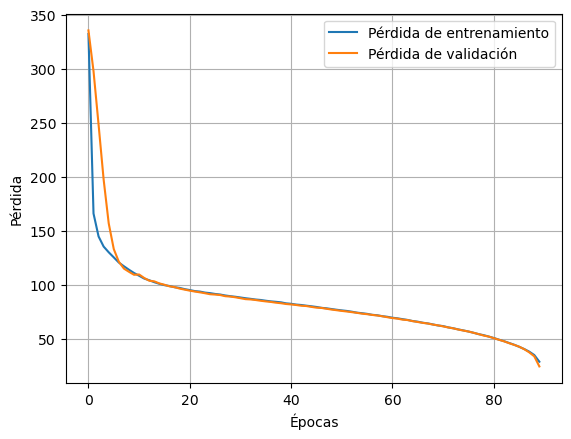

Total de parámetros del modelo 875588


In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


print("Total de parámetros del modelo", vae.count_params())

Vemos como se completan todas las épocas que hemos definido, lo que nos indica que el early stop NO está haciendo efecto. Esto se debe a que en cada época el modelo consigue mejorar, ajustándose cada vez más a los datos.

La pérdida del modelo se queda en torno al valor 25 o 30. En el contexto en el que nos encontramos y atendiendo a que no trabajamos con un modelo excesivamente complejo, como podemos ver por su número de parámetros, podemos entender que se trata de un buen valor de pérdida. Sin embargo es claramente mejorable. Probablemnte un aumento de los parámetros del modelo nos reporte una menos pérdida y por tanto un modelo generador mejor, pero debemos actuar con cautela, porque ya conocemos que aprende con demasiada rapidez y corremos el riesgo de inestabilidad, como explosiones de gradiente o divergencia del entrenamiento.

Conforme a lo que pide el enunciado vamos a generar imágenes nuevas y reconstruidas por el modelo. Para la generación de imágenes nuevas, vamos a generar codificaciones del espacio latentes de forma artificial. Para ellos simplemente muestremos vectores aleatorios de una distribución normal.

In [8]:
import numpy as np

latent_dim = 64

artifitial_latent_vectors = np.random.normal(loc=0.0, scale=1.0, size=(10, latent_dim))

output_images = vae.predict(images[:100], verbose = False)
generated_images = decoder.predict(artifitial_latent_vectors, verbose = False)

In [9]:
from sklearn.metrics import r2_score
#Función para evaluar el rendimiento general del modelo en la reconstrucción de las entradas.
def R2_coefficent(x_test, decoded):
    r2 = np.zeros(len(x_test))
    for i in range(len(x_test)):
        r2[i] = r2_score(x_test[i].flatten(), decoded[i].flatten())
    r2 = r2.mean()
    return r2

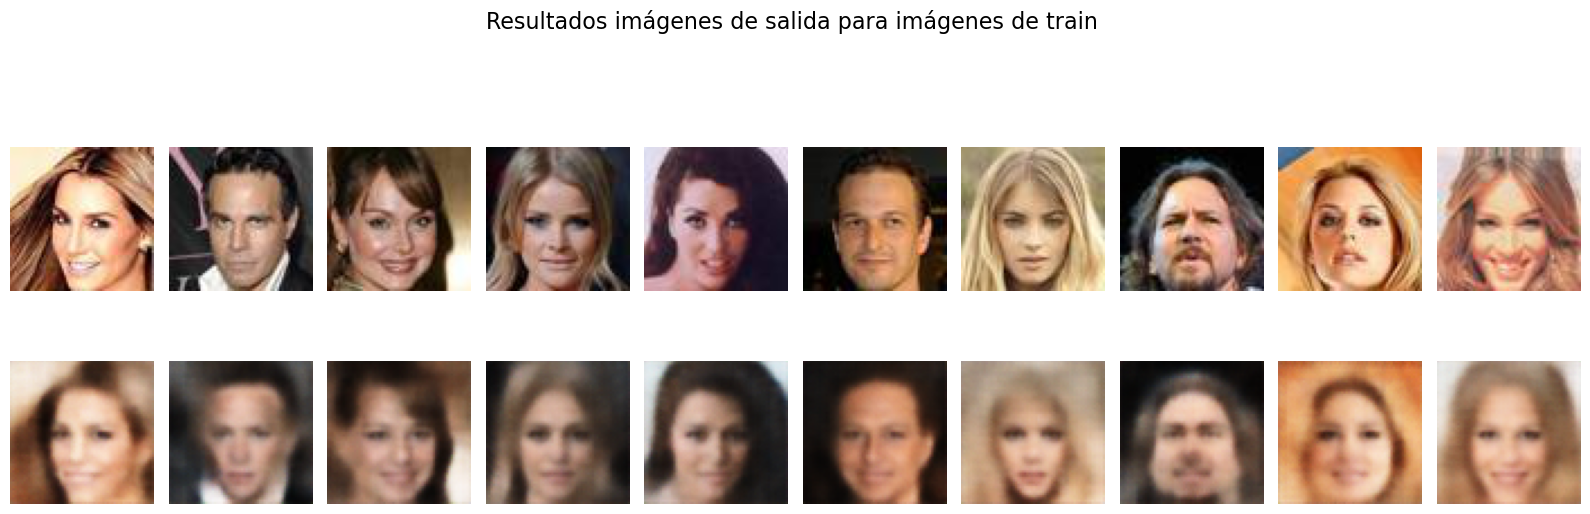

Coeficiente de dterminación R2 0.8719138827912356


In [10]:
#Visualización
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2,10, figsize = (16,6))
fig.suptitle(f'Resultados imágenes de salida para imágenes de train ', fontsize=16)

for i in range(10):
    axes[0,i].imshow(images[i])
    axes[0,i].axis('off')
    axes[1,i].imshow(output_images[i])
    axes[1,i].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


r2 = R2_coefficent(images[:100], output_images)

print('Coeficiente de dterminación R2', r2)

Si comparamos la capacidad de reconstrucción del VAE con la del autoencoder convolucional de la sesión anterior, se aprecia claramente como los convolucionales tienen mucho mejor capacidad de reconstrucción que los VAE. Además de que los VAE no han sido creados para reconstruir imágenes, las salidas que ofrecen se ven modificadas por las muestras aleatorias tomadas del espacio latente, lo que introduce variabilidad y ruido en la salida. Esta naturaleza probabilística hace que, incluso con la misma entrada, el VAE pueda generar salidas ligeramente distintas, afectando negativamente a la fidelidad de la reconstrucción en comparación con un autoencoder convolucional determinista.
Si la tarea a la que nos enfrentásemos fuera reconstrucción de imágenes, opataríamos claramente por un autoencoder convolucional, no solo por tener mejor desempeño en esa tarea, sino por presentar menos complejidad, menor número de parámetros (este modelo simple de VAE tiene más parámetros que el más complejo convolucional que realizamos en la sesión anterior).

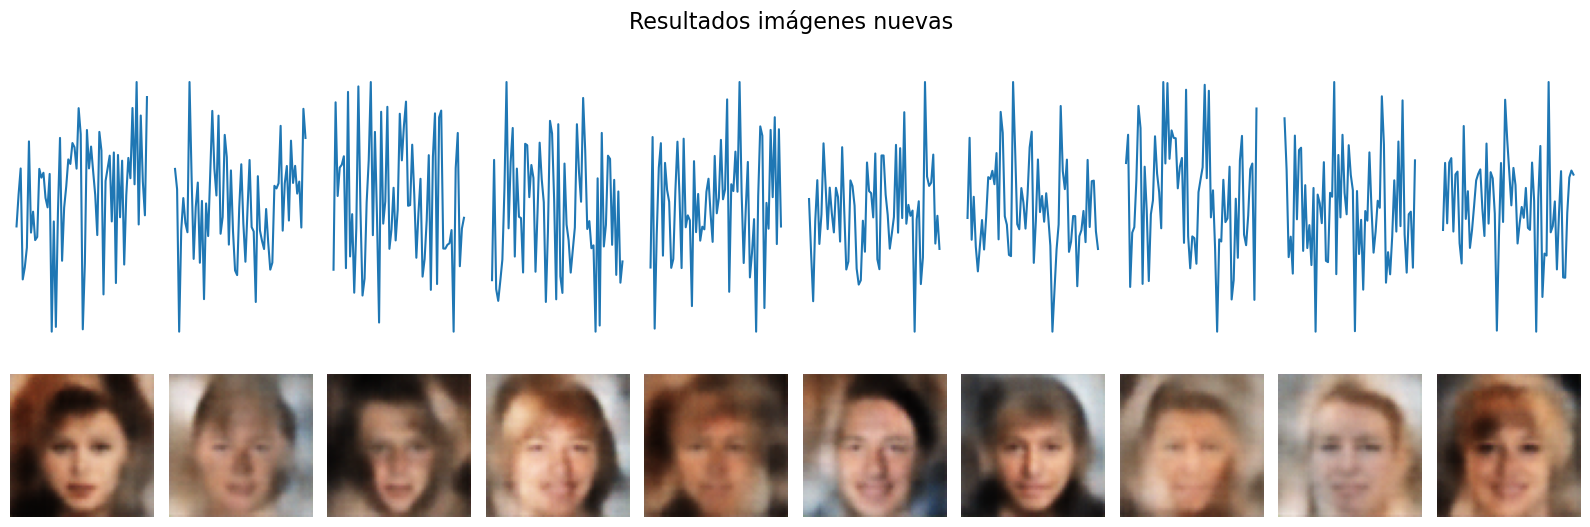

In [11]:
fig, axes = plt.subplots(2,10, figsize = (16,6))
fig.suptitle(f'Resultados imágenes nuevas ', fontsize=16)

for i in range(10):
    axes[0,i].plot(artifitial_latent_vectors[i])
    axes[0,i].axis('off')
    axes[1,i].imshow(generated_images[i])
    axes[1,i].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


Las imágenes generadas a partir de vectores aleatorios que siguen una normal 0,1 se asemejan bastante a cara reales, pero represnetadas con mucho ruido, esto es una característcia experable viendo la pérdida que reporta el modelo y que es claramente mejorable en cuanto complejidad.

In [12]:
from tensorflow.keras import backend 
import gc

#Para borrar el espacio que ocupe de VRAM el modelo en la gpu
backend.clear_session()
del vae
# del encoder
del decoder
del history
gc.collect()

39230


**E3:** Evalúe la influencia sobre las prestaciones analizadas en el ejercicio E2 de:
- El aumento de la dimensión del espacio latente (máximo 1024).
- La ponderación de las pérdidas en la implementación de la suma de la pérdida combinada (desde 1 a 1, hasta un máximo de 10 a 1, orientativamente).


Probamos variando la dimensión del espacio latente. Conforme aumentamos la dimensión del espacio latente,  podríamos aumentar consecuentemente el número de filtros de las capas convolucionales de los encoders y decoders, sin embargo esto dispara el número de parámetros y propicia un consumo excesivo de recursos, por lo que solo aumentaremos la dimensionalidad del espacio latente. También variaremos la ponderación que regula la pérdida combinada del modelo, de forma que podamos aumentar el peso que tiene la pérdida KL con respecto a la de reconstrucción (.mean(reconstruction_loss + self.kl_weight * kl_loss)). 

Dado que este modelo tiende a aprender de forma muy rápida, aumentar su número de parámetros podría incluso provocar pérdidas negativas. Al incrementar su capacidad con una mayor dimensionalidad del espacio latente, el modelo adquiere mayor habilidad para aproximar funciones complejas, lo que se traduce en una caída brusca de la función de pérdida sobretodo en las etapas iniciales. Para mitigar este sobreaprendizaje y estabilizar el entrenamiento, convendría reducir el learning rate dinámicamente conforme se aumenta la complejidad del modelo o conforme la pérdida se acerque al valor 0, con tal de que no lo sobrepase. Un valor de tasa de aprendizaje más bajo permite actualizaciones más finas en cada iteración, favoreciendo una convergencia más controlada. 
Para controlar esta característcia tendríamos que construir un callback que funcionase como un early_stop pero que se activara al estar la pérdida muy cerca del valor 0, o bien otro callback que pudiera ajustar el learning rate del modelo conforme a la pérdida obtenida en cada epoch, o incluso añadiendo algún tipo de DropOut.

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend 
import gc

results = {}
new_images = {}
latent_dims = [64, 256, 1024]
kl_weights = [1, 5, 10]
end = False

i = 1
for dim in latent_dims:
    if end : break 
    for k in kl_weights:
        
        model_encoder, model_decoder = vae_structure(input_shape = x_train.shape[1:], latent_dim = dim)

        model = VAE(model_encoder, model_decoder, kl_weight = k)
                                                    
        model.compile(optimizer = Adam(learning_rate=0.0001555))
        # vae.compile(optmizer = 'adam')
        early_stop = keras.callbacks.EarlyStopping(monitor = 'loss', 
                                                min_delta = 1e-6, 
                                                patience = 5, 
                                                restore_best_weights = True)


        history = model.fit(x = x_train, y = x_train, batch_size = 128, epochs = 90, validation_split=0.2, callbacks = [early_stop])
        artifitial_latent_vectors = np.random.normal(loc=0.0, scale=1.0, size=(10, dim))

        results[f'Modelo {i}'] = {'Dimensión capas':[16, 32, 64], 'Dimensión Espacio latente':dim,'Número de Hiperparámetros':model.count_params(), 'Ponderación Pérdidas':k, 'Pérdida mínima (train)':min(history.history['loss']), 'Epoch de Pérdida Mínima':history.history['loss'].index(min(history.history['loss']))+1}
        new_images[f'Modelo {i}'] = {'Imágenes Generadas Artificialmente':model_decoder.predict(artifitial_latent_vectors, verbose = False), 'Vectores Aleatorios':artifitial_latent_vectors}
        i += 1

            #Para borrar el espacio que ocupe de VRAM el modelo en la gpu
        del model_encoder
        del model
        del model_decoder
        backend.clear_session()
        gc.collect()

Epoch 1/90
63/63 [==============================] - 3s 36ms/step - loss: 381.4444 - val_loss: 331.2086
Epoch 2/90
63/63 [==============================] - 2s 29ms/step - loss: 190.5769 - val_loss: 295.5242
Epoch 3/90
63/63 [==============================] - 2s 29ms/step - loss: 153.2750 - val_loss: 255.4288
Epoch 4/90
63/63 [==============================] - 2s 29ms/step - loss: 138.4869 - val_loss: 207.9340
Epoch 5/90
63/63 [==============================] - 2s 29ms/step - loss: 130.1550 - val_loss: 167.3821
Epoch 6/90
63/63 [==============================] - 2s 28ms/step - loss: 124.5453 - val_loss: 139.2737
Epoch 7/90
63/63 [==============================] - 2s 28ms/step - loss: 119.4092 - val_loss: 123.2904
Epoch 8/90
63/63 [==============================] - 2s 28ms/step - loss: 115.4261 - val_loss: 114.3155
Epoch 9/90
63/63 [==============================] - 2s 29ms/step - loss: 112.2916 - val_loss: 109.8536
Epoch 10/90
63/63 [==============================] - 2s 29ms/step - loss:

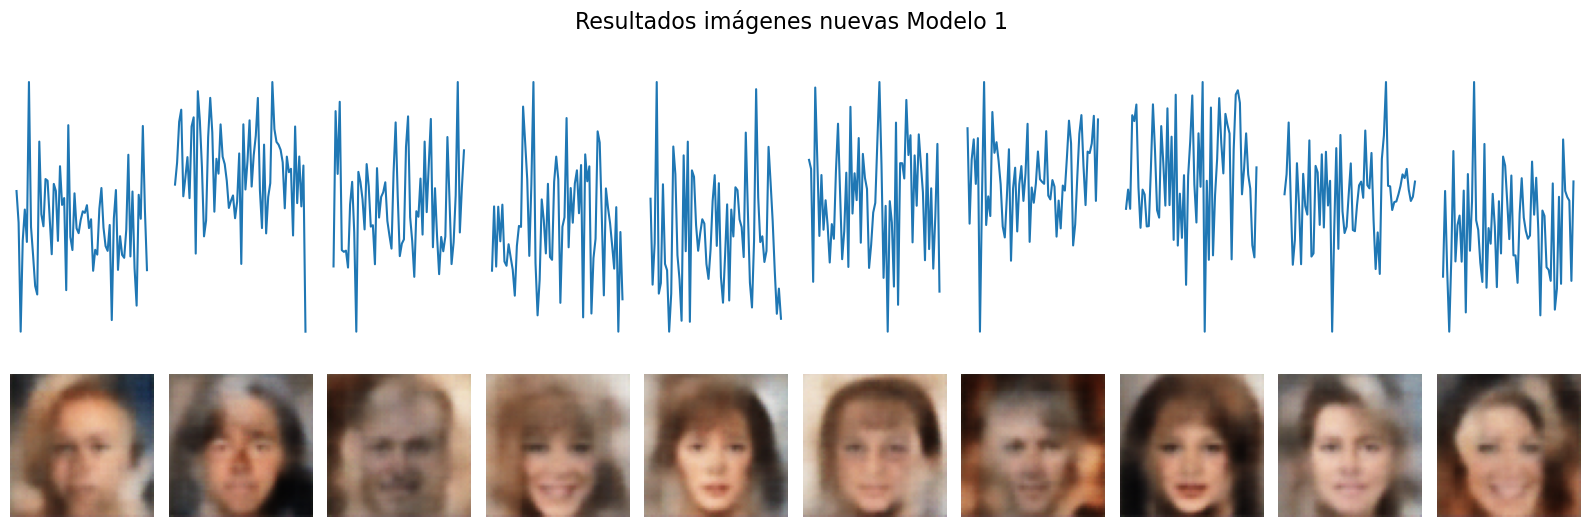

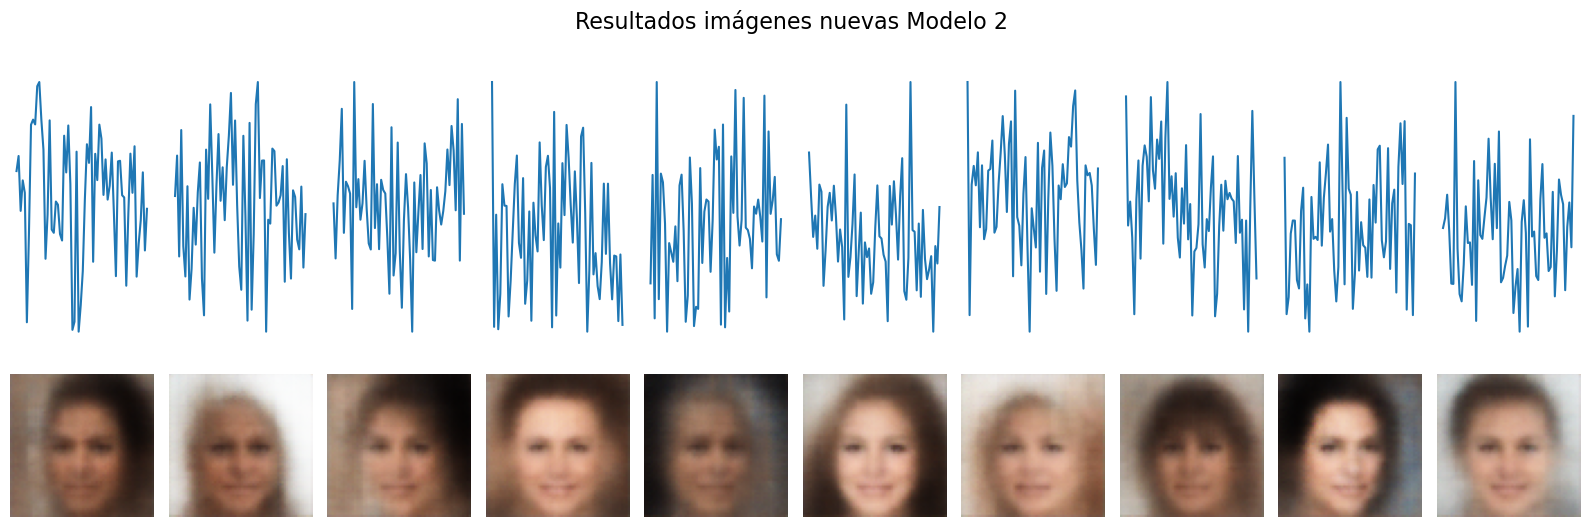

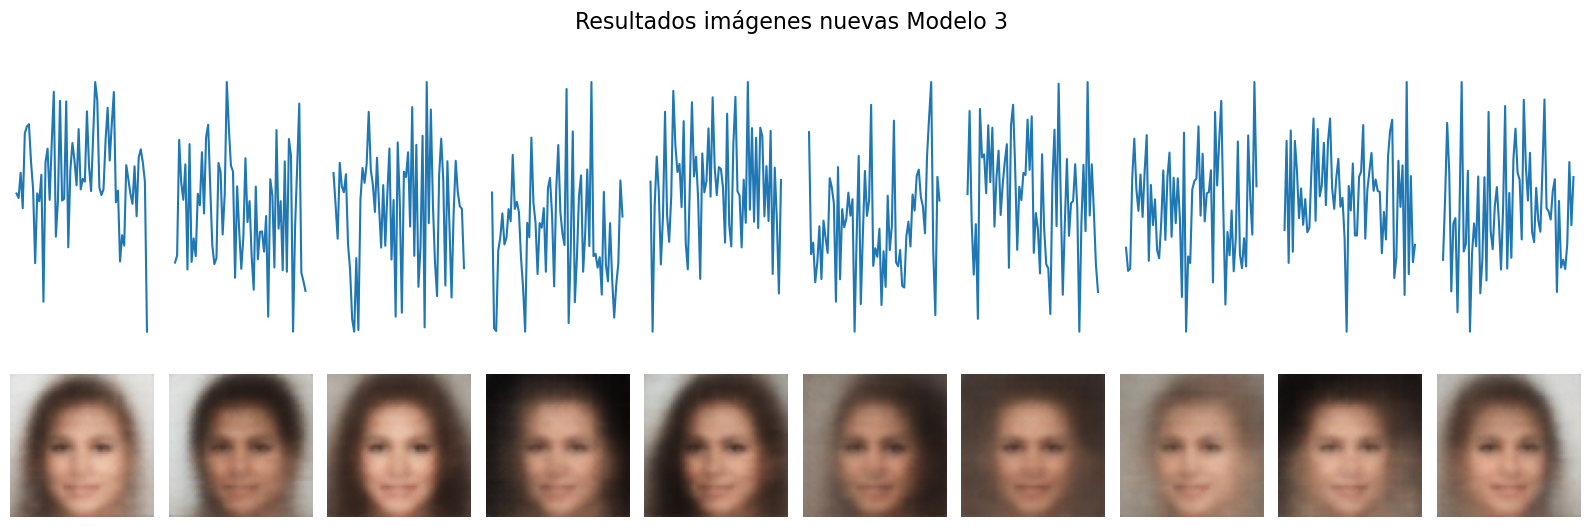

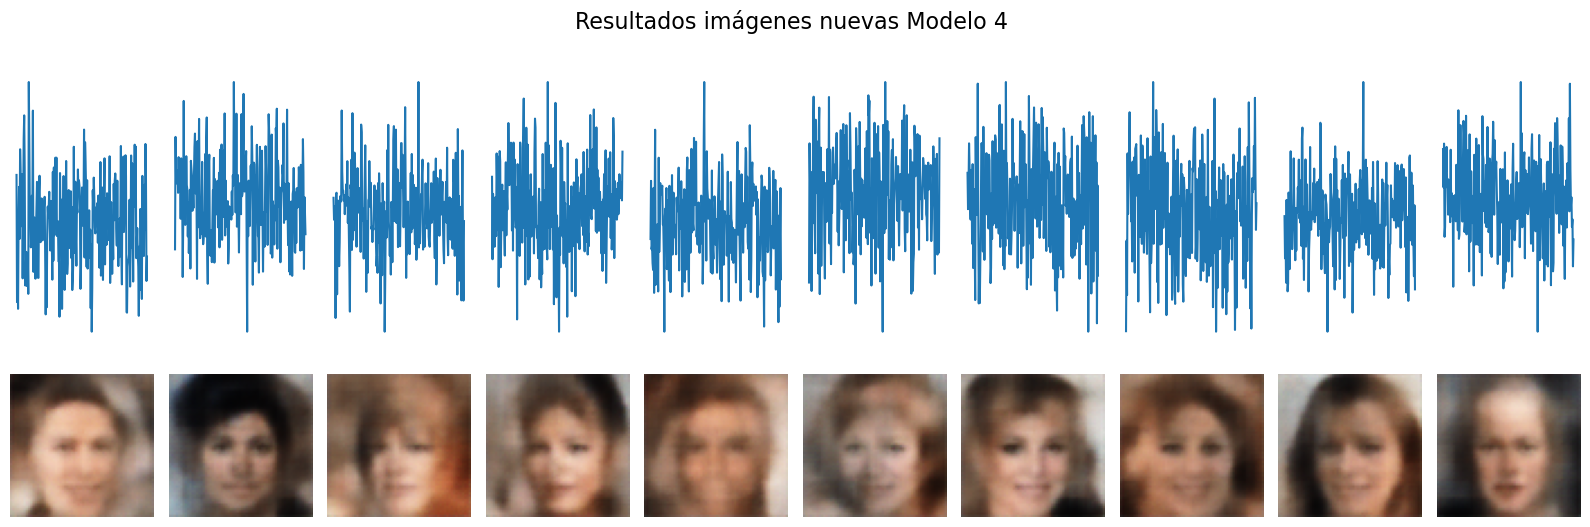

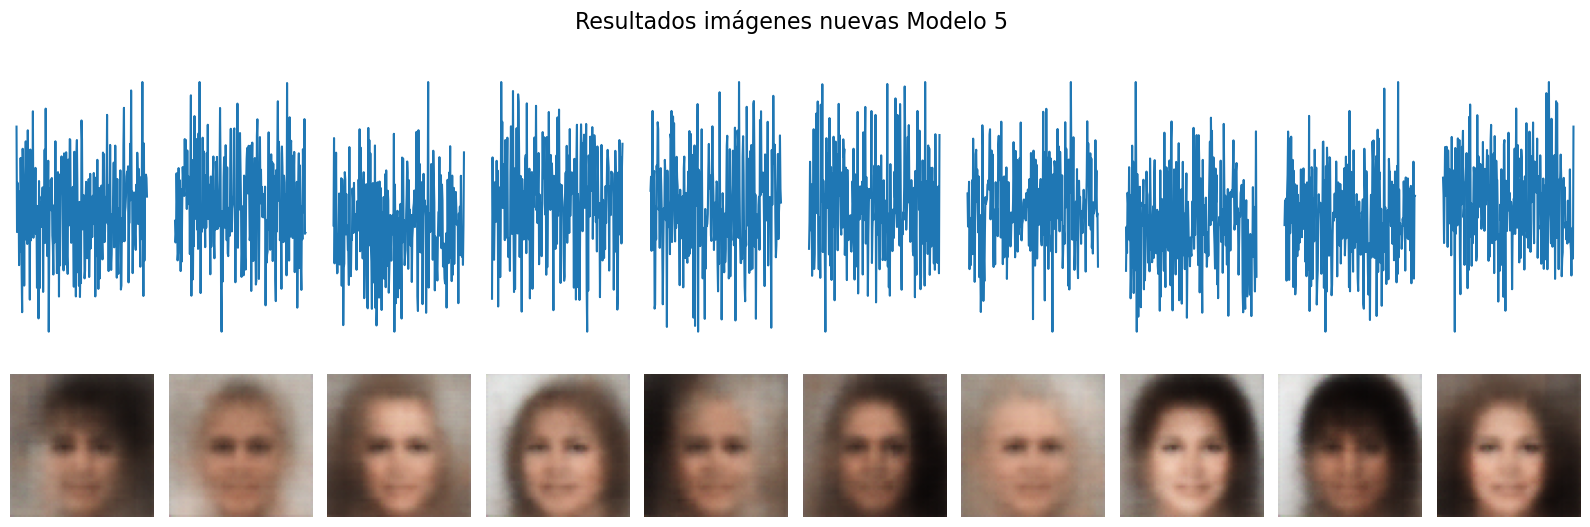

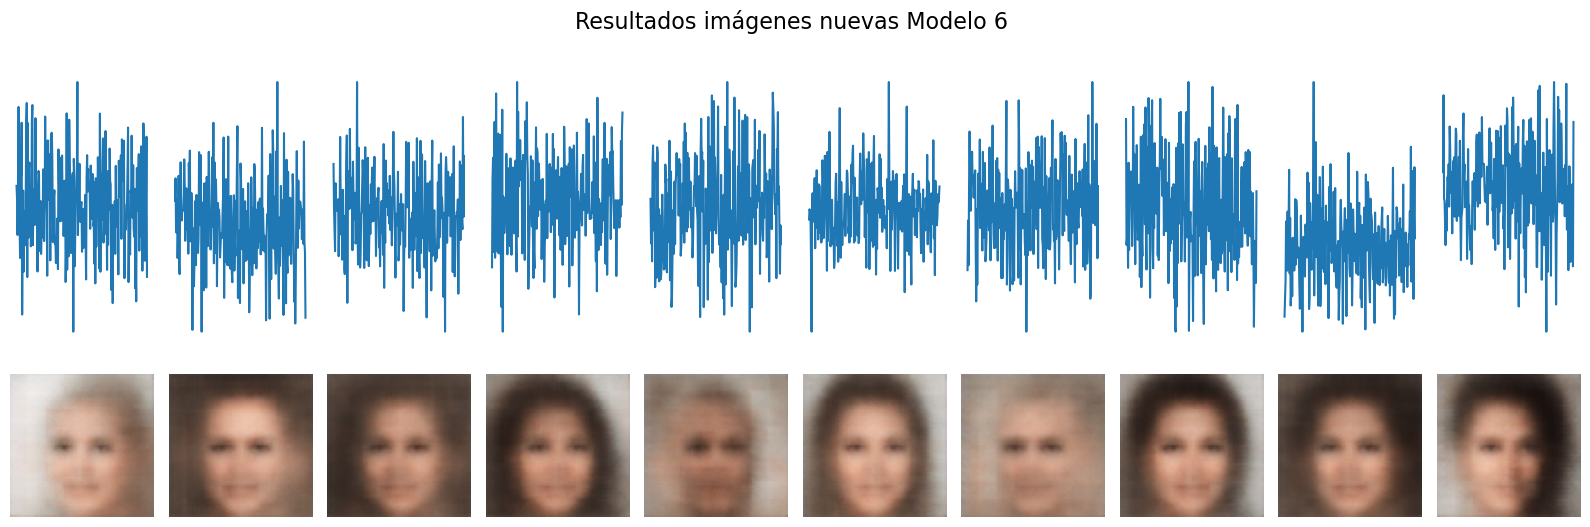

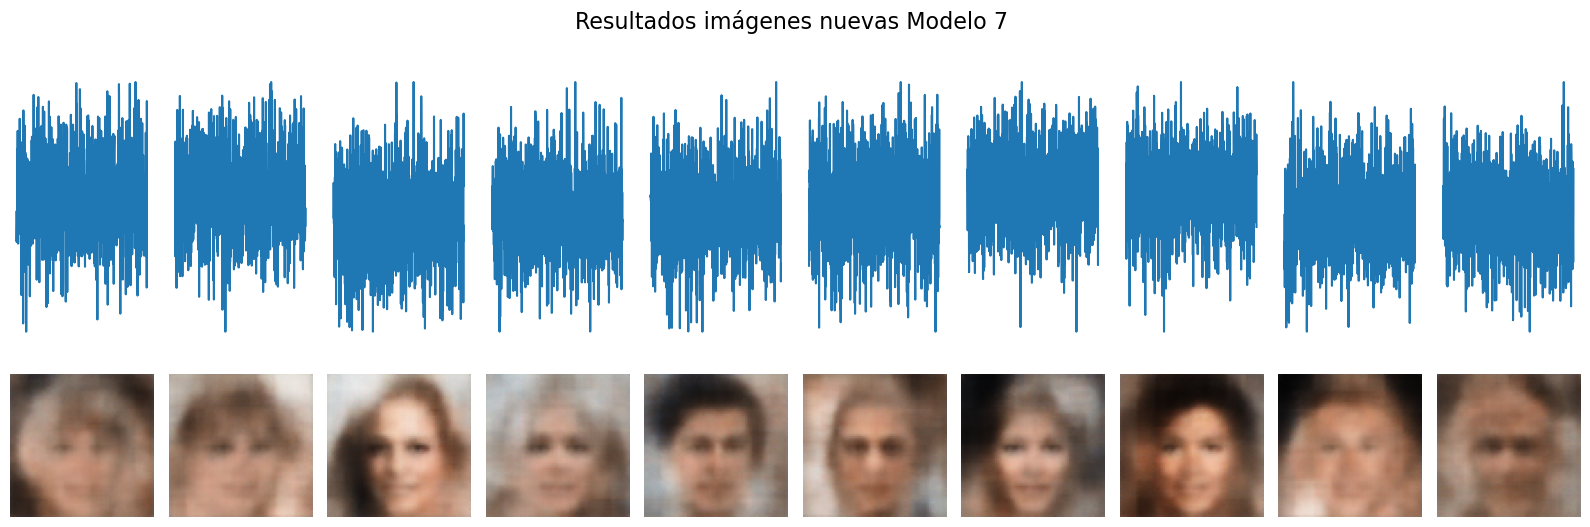

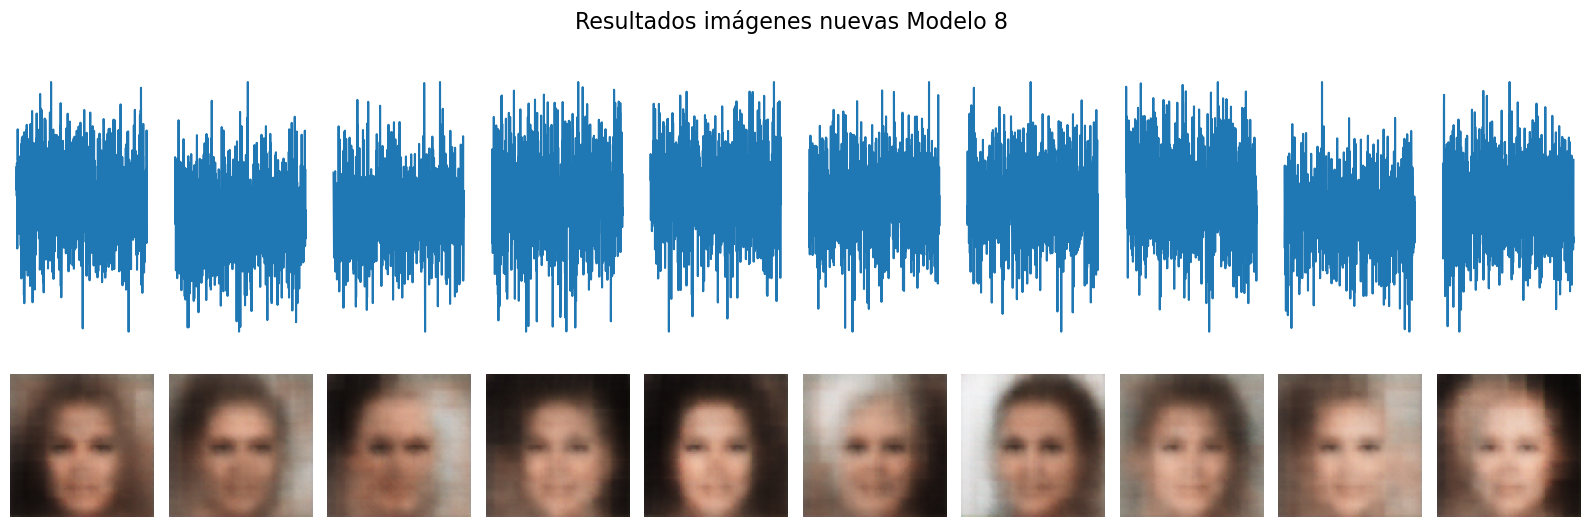

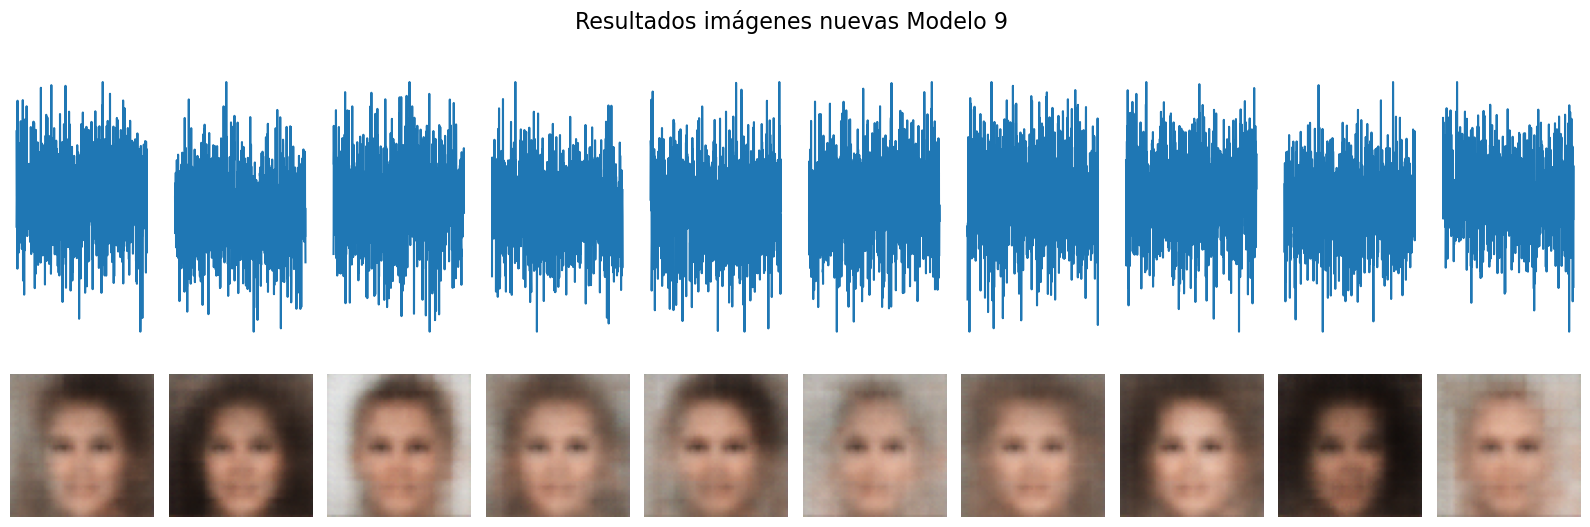

In [18]:


for model, dic in new_images.items():
    fig, axes = plt.subplots(2,10, figsize = (16,6))
    fig.suptitle(f'Resultados imágenes nuevas {model} ', fontsize=16)
    for i in range(10):
        axes[0,i].plot(dic['Vectores Aleatorios'][i])
        axes[0,i].axis('off')
        axes[1,i].imshow(dic['Imágenes Generadas Artificialmente'][i])
        axes[1,i].axis('off')
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

In [19]:
import pandas as pd

pd.DataFrame(results).T

Dimensión capas Dimensión Espacio latente Número de Hiperparámetros  \
Modelo 1    [16, 32, 64]                        64                    875588   
Modelo 2    [16, 32, 64]                        64                    875588   
Modelo 3    [16, 32, 64]                        64                    875588   
Modelo 4    [16, 32, 64]                       256                   3235268   
Modelo 5    [16, 32, 64]                       256                   3235268   
Modelo 6    [16, 32, 64]                       256                   3235268   
Modelo 7    [16, 32, 64]                      1024                  12673988   
Modelo 8    [16, 32, 64]                      1024                  12673988   
Modelo 9    [16, 32, 64]                      1024                  12673988   

         Ponderación Pérdidas Pérdida mínima (train) Epoch de Pérdida Mínima  
Modelo 1                    1               34.01067                      90  
Modelo 2                    5             141.804169                      90  
Modelo 3                   10             176.087906                      90  
Modelo 4                    1              45.072151                      90  
Modelo 5                    5             146.556091                      90  
Modelo 6                   10             179.879181                      78  
Modelo 7                    1              67.433319                      90  
Modelo 8                    5             156.907196                      90  
Modelo 9                   10              193.44017                      83

Los modelos con menor pérdida, vemos en las gráficas como son claramente los que mejores imágenes generan, más realistas. Estos son el 1, el 4 y el 7. Entre ellos todos tienen en común no solo tener las menores pérdidas, sino que el peso de KL es 1, es decir calculan la pérdida combinada dándole igual importancia a la pérdida divergencia KL que a la pérdida de de reconstrucción. 
En los casos en los que le hemos dado mayor importancia a la pérdida de divergencia KL, es decir cuando hemos penalizado más al modelo si no seguía la distribución que queremos, hemos obtenido pérdidas mucho mayores, lo cual puede estar relacionado con que el aumento de K obliga al modelo a centrarse mucho más en minimizar el error que pudiera cometer al intentar que su epsacio latente se parezca lo máximo posible a la distribución deseada.

Al centrarse más en esa condición, se fuerza al modelo a centrarse menos en la información útil que le llega al espacio latente para ser reconstruida. Esto penaliza la reconstrucción, porque el modelo "olvida" detalles de la entrada original para cumplir la distribución de probabilidad que se busca para el espacio latente.
Un aumento excesivo del parámetro K fuerza al espacio latente a seguir de manera estricta la distribución objetivo, logrando representaciones más ordenadas y estructuradas, pero sacrifica la fidelidad de las imágenes generadas haciendo que tiendan a ser de peor calidad (más difusas o menos nítidas). 

Cabe destacar también que el aumento del tamaño del espacio latente incrementa el número de parámetros, pero no consigue bajar la pérdida combinada del modelo. Por lo que un aumento en la dimensión del espacio latente no significa una mejoría ni en la reconstrucción ni en la generación de imágenes. Probablemente para apreciar dicha mejoría haría falta aumentar también el número de filtros de la capas del encoder y decoder o aumentar las epochs de entrenamiento.

También se aprecia como un espacio latente excesivamente amplio parece dar lugar a imágenes más borrosas, lo que puede entenderse como que se están obtenidendo vectores demasiado dispersos en el espacio latente.



**E4:** Volviendo a la configuración del ejercicio E2, codifique todas las imágenes de entrenamiento en el espacio latente, aplique a las codificaciones resultantes una reducción de dimensionalidad a 2 dimensiones con el [algoritmo PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), y compruebe mediante representación visual de dichas componentes si la estadística de dicho espacio se ajusta la predeterminada.


El modelo del ejercicio 2 los tenemos guardados como encoder, decoder y vae, para evitar que se sobreescriban durante las iteraciones del ejercicio anterior. Por lo que solo tenemos que emplear al encoder para obtener a partir de las imágenes de train su codificación correspondiente en el espacio latente.

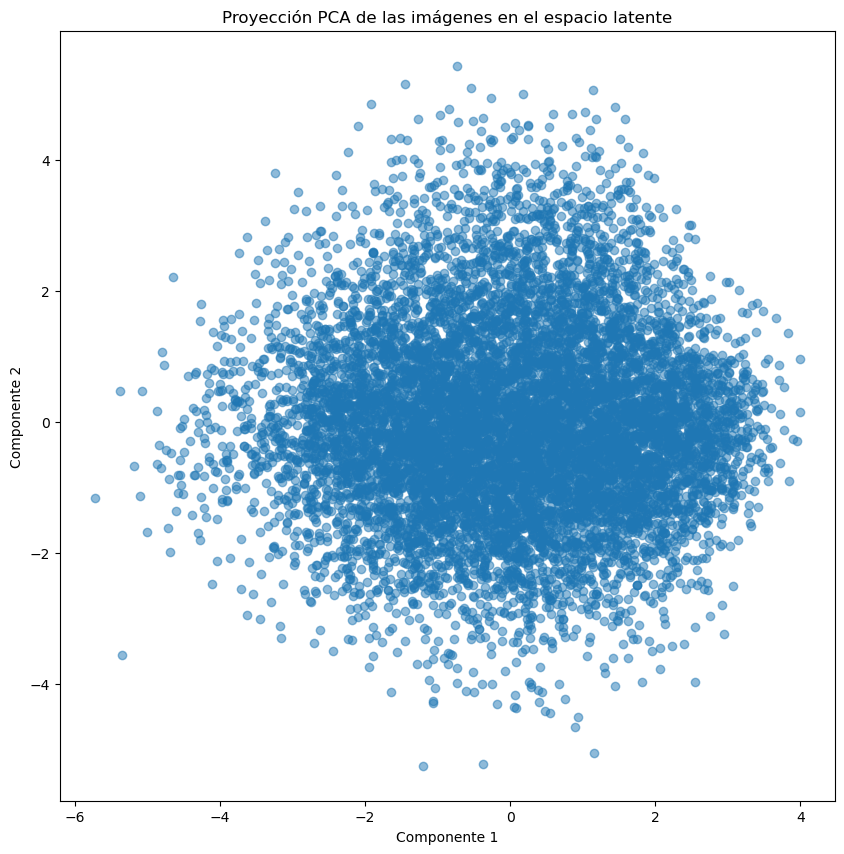

Media de las componentes PCA: [-1.9350053e-07 -1.4543534e-07]
Desviación estándar de las componentes PCA: [1.6376456 1.457409 ]


In [20]:
from sklearn.decomposition import PCA

#Extraemos el 
z_mean, z_log_var, z = encoder.predict(x_train, verbose = False)
# Aplicamos el algoritmo de PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(z)
# Visualizamos los resultados
plt.figure(figsize=(10, 10))
plt.scatter(z_pca[:, 0], z_pca[:, 1], alpha=0.5)
plt.title("Proyección PCA de las imágenes en el espacio latente")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

print("Media de las componentes PCA:", z_pca.mean(axis=0))
print("Desviación estándar de las componentes PCA:", z_pca.std(axis=0))

Al graficar las codificaciones del espacio latente en 2 dimensiones, se aprecia una nube de puntos centrada en el origen, con forma más o menos circular, y sin acumulaciones alejadas del centro ni patrones evidentes. Esto nos indica que sigue una normal estándar multivariante,  por lo que el autoencoder está aprendiendo una representación latente conforme a las características que buscábamos.




**E5:** Dadas las particularidades del conjunto de datos (imágenes de caras), resulta directo aplicar un aumento de datos trivial que duplique el tamaño del conjunto de entrenamiento, y que consiste en realizar un giro especular (horizontal) a cada una de las imágenes, y añadir dichas imágenes al conjunto inicial de entrenamiento. Implemente dicho aumento de datos y comente su influencia en la calidad de las imágenes generadas. En función de las posibilidades de cómputo, aumente también la cantidad de imágenes del conjunto de entrenamiento que se leen inicialmente del dataset [50k Celeba Dataset 64x64](https://www.kaggle.com/datasets/therealcyberlord/50k-celeba-dataset-64x64)


In [15]:
try:
    from tensorflow.keras import backend 
    import gc
    del encoder
    del vae
    del decoder
    backend.clear_session()
    gc.collect()
except:
    pass
#Para borrar el espacio que ocupe de VRAM el modelo en la gpu

In [16]:
from tensorflow.keras.optimizers import Adam
import numpy as np

x_train = images
x_train_flipped = np.flip(x_train, axis=2) # Volteamos las imágenes horizontalmente
x_train = np.concatenate((x_train, x_train_flipped), axis=0) # Concatenamos las imágenes originales y las volteadas

KL_WEIGHT = 1
encoder, decoder = vae_structure(input_shape = x_train.shape[1:], latent_dim = 64)
vae = VAE(encoder, decoder, kl_weight = KL_WEIGHT)
vae.compile(optimizer = Adam(learning_rate=0.00001555))
# vae.compile(optmizer = 'adam')
early_stop = keras.callbacks.EarlyStopping(monitor = 'loss', 
                                        min_delta = 1e-6, 
                                        patience = 5, 
                                        restore_best_weights = True)

history = vae.fit(x = x_train, y = x_train, batch_size = 64, epochs = 90, validation_split=0.2, callbacks = [early_stop])


Epoch 1/90
250/250 [==============================] - 6s 19ms/step - loss: 440.8375 - val_loss: 360.1357
Epoch 2/90
250/250 [==============================] - 4s 16ms/step - loss: 277.9665 - val_loss: 241.1884
Epoch 3/90
250/250 [==============================] - 4s 16ms/step - loss: 206.7630 - val_loss: 196.2855
Epoch 4/90
250/250 [==============================] - 4s 15ms/step - loss: 176.7806 - val_loss: 172.4207
Epoch 5/90
250/250 [==============================] - 4s 15ms/step - loss: 160.2853 - val_loss: 156.5880
Epoch 6/90
250/250 [==============================] - 4s 15ms/step - loss: 150.1694 - val_loss: 147.0281
Epoch 7/90
250/250 [==============================] - 4s 15ms/step - loss: 143.2698 - val_loss: 140.3466
Epoch 8/90
250/250 [==============================] - 4s 15ms/step - loss: 138.4621 - val_loss: 135.6965
Epoch 9/90
250/250 [==============================] - 4s 15ms/step - loss: 134.5630 - val_loss: 132.1853
Epoch 10/90
250/250 [==============================] - 

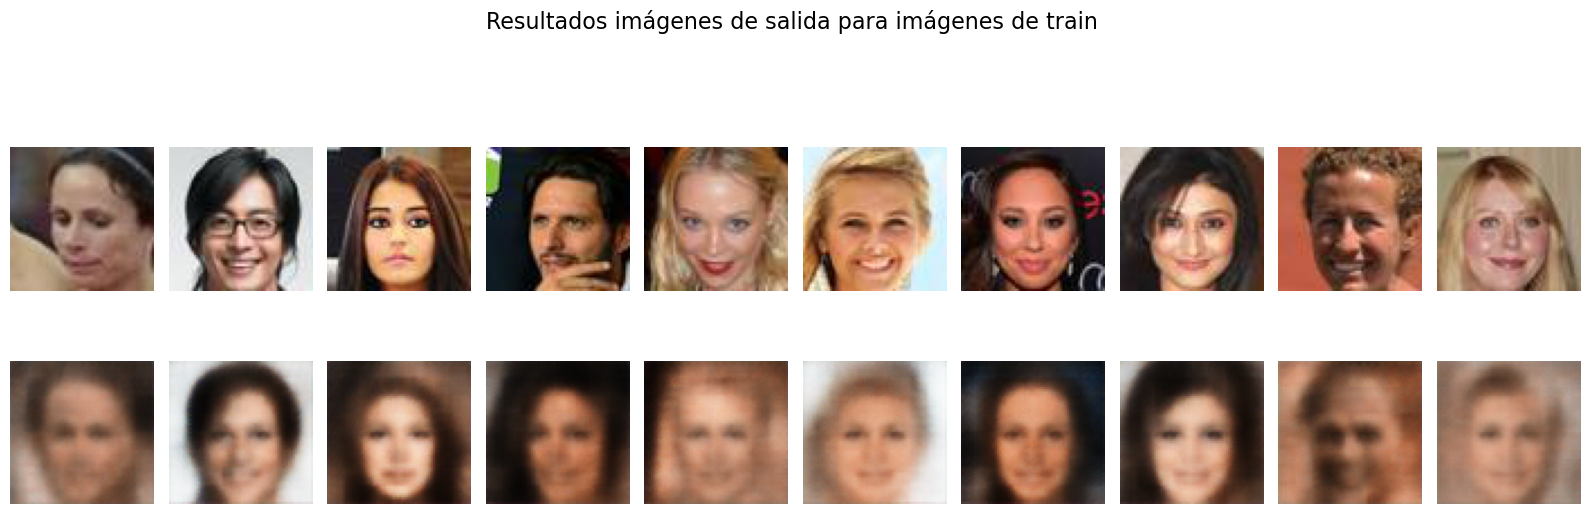

In [20]:
import matplotlib.pyplot as plt

output_images = vae.predict(images, verbose = False)

fig, axes = plt.subplots(2,10, figsize = (16,6))
fig.suptitle(f'Resultados imágenes de salida para imágenes de train ', fontsize=16)

for i in range(10):
    axes[0,i].imshow(images[len(images)-i-1])
    axes[0,i].axis('off')
    axes[1,i].imshow(output_images[len(output_images)-i-1])
    axes[1,i].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


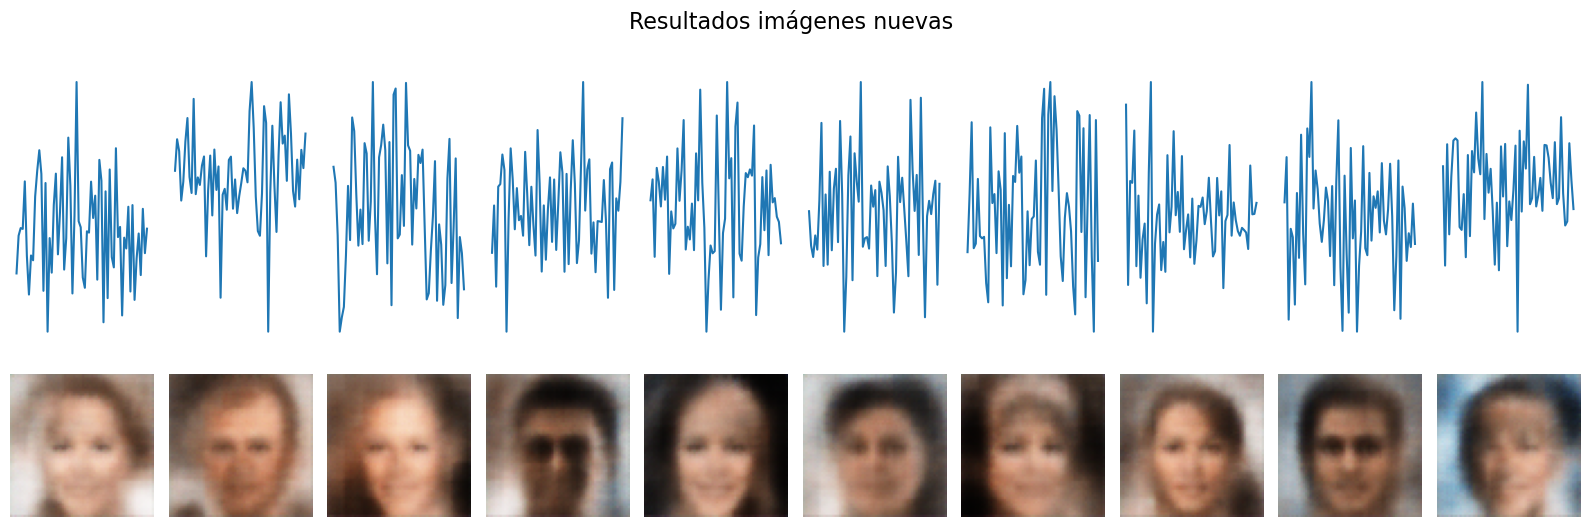

In [21]:
import numpy as np

latent_dim = 64
artifitial_latent_vectors = np.random.normal(loc=0.0, scale=1.0, size=(10, latent_dim))
generated_images = decoder.predict(artifitial_latent_vectors, verbose = False)
fig, axes = plt.subplots(2,10, figsize = (16,6))
fig.suptitle(f'Resultados imágenes nuevas ', fontsize=16)

for i in range(10):
    axes[0,i].plot(artifitial_latent_vectors[i])
    axes[0,i].axis('off')
    axes[1,i].imshow(generated_images[i])
    axes[1,i].axis('off')
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

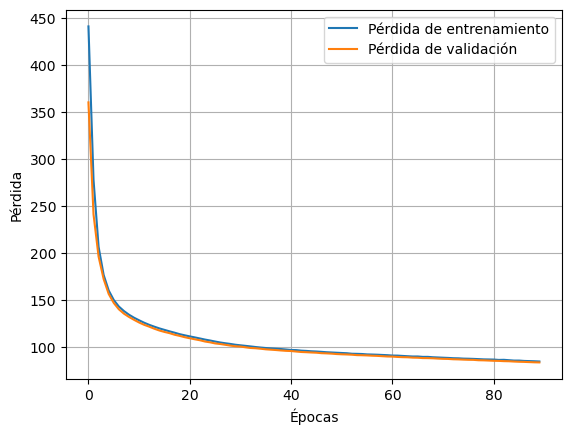

Total de parámetros del modelo 875588


In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()


print("Total de parámetros del modelo", vae.count_params())

Intenté aumentar el número de imágenes a 15.000, las cuales al hacerle el giro especular se duplicaban hasta ser 30.000 imágenes, pero al poco de empezar el entreamiento la memoria RAM se llenaba y el entorno abortaba.


Este aumento en los datos de entrenamiento no supone una mejoría real en la reconstrucción de las imágenes. Esto probablemente se deba a que el giro horizontal no aporta nueva información sobre la estructura de las caras simplemente les cambia la orientación. En la calidad visual no se ven mejorías